In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,SimpleRNN
from sklearn.preprocessing import MinMaxScaler
import pandas_datareader as web
plt.style.use("fivethirtyeight")





In [ ]:
import pandas
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [ ]:
pip install yfinance

In [ ]:
df=pdr.get_data_yahoo("^n225",start="2010-01-01", end="2020-03-31")


[*********************100%%**********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,10609.339844,10694.490234,10608.139648,10654.790039,10654.790039,104400000
2010-01-05,10719.440430,10791.040039,10655.570312,10681.830078,10681.830078,166200000
2010-01-06,10709.549805,10768.610352,10661.169922,10731.450195,10731.450195,181800000
2010-01-07,10742.750000,10774.000000,10636.669922,10681.660156,10681.660156,182600000
2010-01-08,10743.299805,10816.450195,10677.559570,10798.320312,10798.320312,211800000
...,...,...,...,...,...,...
2023-03-24,27368.619141,27397.289062,27257.439453,27385.250000,27385.250000,59500000
2023-03-27,27482.390625,27543.480469,27359.720703,27476.869141,27476.869141,57400000
2023-03-28,27573.820312,27603.449219,27432.759766,27518.250000,27518.250000,66400000


In [ ]:
df.to_csv('/content/SP500.csv')

In [ ]:
from sklearn.svm import SVR

dates = dates_df['Date'].as_matrix()
prices = df['Adj Close'].as_matrix()

#Convert to 1d Vector
dates = np.reshape(dates, (len(dates), 1))
prices = np.reshape(prices, (len(prices), 1))

svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
svr_rbf.fit(dates, prices)

plt.figure(figsize = (12,6))
plt.plot(dates, prices, color= 'black', label= 'Data')
plt.plot(org_dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=[16,8])
plt.title('Closing Price')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Stock Price')

In [ ]:
data= df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*0.8)
testing_data_len=math.ceil(len(dataset)*0.2)

print(training_data_len,testing_data_len)





2004 501


In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data


array([[0.15485325],
       [0.15653165],
       [0.15961162],
       ...,
       [0.65202933],
       [0.69702018],
       [0.67812214]])

In [ ]:
trained_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range(60,len(trained_data)):
  x_train.append(trained_data[i-60:i,0])
  y_train.append(trained_data[i,0])
  if(i==60):
    print(x_train)
    print(y_train)
    print()


[array([0.15485325, 0.15653165, 0.15961162, 0.15652111, 0.16376231,
       0.16877884, 0.15983384, 0.17055034, 0.17516965, 0.16728544,
       0.1616879 , 0.15998835, 0.16811285, 0.1508658 , 0.146033  ,
       0.13440029, 0.12985668, 0.1399252 , 0.12650237, 0.12693559,
       0.13724373, 0.13930698, 0.13630587, 0.11775347, 0.11121929,
       0.11004491, 0.11197469, 0.11993219, 0.11503538, 0.11633578,
       0.13325507, 0.13504645, 0.12188057, 0.13906736, 0.13606499,
       0.12655141, 0.12053859, 0.12203266, 0.12488974, 0.12797965,
       0.12992245, 0.1232548 , 0.13711152, 0.15057842, 0.14944442,
       0.14921286, 0.1554839 , 0.16084122, 0.16088595, 0.15900703,
       0.16678269, 0.16039247, 0.16540094, 0.16226206, 0.16479951,
       0.16565729, 0.17605544, 0.17544091, 0.18231029, 0.18186343])]
[0.19145089755489153]



In [ ]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1944, 60, 1)

In [ ]:
model=Sequential()
model.add(LSTM(60,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(80,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(80,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(120,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))



In [ ]:
model=Sequential()
model.add(SimpleRNN(60,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(80,return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(80,return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(120,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [ ]:
model.fit(x_train,y_train,batch_size=20,epochs=100)

Epoch 1/100
98/98 [==============================] - 8s 85ms/step - loss: 0.0016
Epoch 2/100
98/98 [==============================] - 8s 80ms/step - loss: 0.0014
Epoch 3/100
98/98 [==============================] - 8s 86ms/step - loss: 0.0012
Epoch 4/100
98/98 [==============================] - 8s 84ms/step - loss: 0.0013
Epoch 5/100
98/98 [==============================] - 8s 84ms/step - loss: 0.0012
Epoch 6/100
98/98 [==============================] - 8s 81ms/step - loss: 0.0012
Epoch 7/100
98/98 [==============================] - 8s 85ms/step - loss: 0.0012
Epoch 8/100
98/98 [==============================] - 8s 85ms/step - loss: 0.0012
Epoch 9/100
98/98 [==============================] - 8s 85ms/step - loss: 0.0011
Epoch 10/100
98/98 [==============================] - 8s 80ms/step - loss: 0.0014
Epoch 11/100
98/98 [==============================] - 8s 85ms/step - loss: 0.0011
Epoch 12/100
98/98 [==============================] - 8s 86ms/step - loss: 9.9501e-04
Epoch 13/100
98/98 [=

In [ ]:
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
#y_test=[]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  #y_test.append(test_data[i,0])





In [ ]:
x_test=np.array(x_test)
#x_test,y_test=np.array(x_test),np.array(y_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape


(501, 60, 1)

In [ ]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

16/16 [==============================] - 1s 33ms/step


In [ ]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

In [ ]:
map=np.mean(np.abs((y_test - predictions) / y_test)) *100
map

1.8522475143552528

In [ ]:
predictions=scaler.inverse_transform(predictions)

<ipython-input-106-9323b3f4b8f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


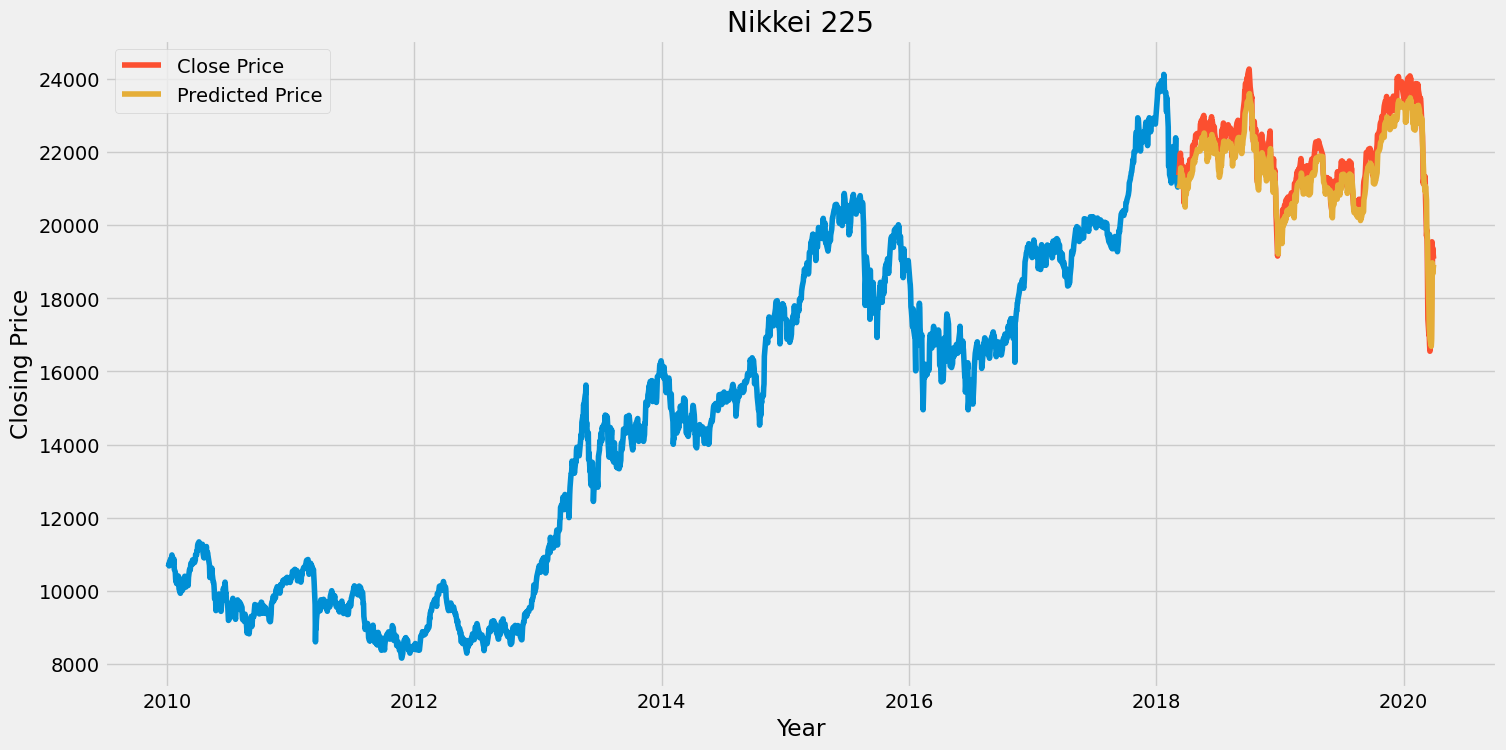

In [ ]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=[16,8])
plt.title('Nikkei 225')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.legend(loc='upper left', frameon=False)
plt.plot(train['Close'])

plt.plot(valid['Close'],label='Close Price')
plt.plot(valid['Predictions'],label='Predicted Price')


plt.legend()
plt.show()


In [ ]:
print(type(y_test))

In [ ]:
y_test1[-21:]

In [ ]:
y_test2=y_test1[-21:]

In [ ]:
predictions2=predictions1[-21:]

In [ ]:
y_test1=y_test.flatten()
predictions1=predictions.flatten()

In [ ]:
print(y_test1[0])

In [ ]:
y_test2=[]
predictions2=[]
for i in range(0,10):
  y_test2.append(y_test1[i])

for i in range(0,10):
  predictions2.append(predictions1[i])




In [ ]:
y_test2=list(y_test2)
predictions2=list(predictions2)

In [ ]:
y_test2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
#IT = [12, 30, 1, 8, 22]
#ECE = [28, 6, 16, 5, 10]
#CSE = [29, 3, 24, 25, 17]

# Set position of bar on X axis
br1 = np.arange(len(y_test2))
br2 = [x + barWidth for x in br1]


# Make the plot
plt.bar(br1, y_test2, color ='r', width = barWidth,
        edgecolor ='grey', label ='actual')
plt.bar(br2, predictions2, color ='g', width = barWidth,
        edgecolor ='grey', label ='predictions')


# Adding Xticks
plt.xlabel('Days in March 2020', fontweight ='bold', fontsize = 15)
plt.ylabel('Close', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(y_test2))],
        ['02', '03', '04', '05', '06','09','10','11','12','13','16', '17', '18', '19', '20','23','24','25','26','27','30'])
plt.title("Dow Jones Industrial Average")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
IT = [12, 30, 1, 8, 22]
ECE = [28, 6, 16, 5, 10]
CSE = [29, 3, 24, 25, 17]

# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth,
        edgecolor ='grey', label ='IT')
plt.bar(br2, ECE, color ='g', width = barWidth,
        edgecolor ='grey', label ='ECE')
plt.bar(br3, CSE, color ='b', width = barWidth,
        edgecolor ='grey', label ='CSE')

# Adding Xticks
plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
plt.ylabel('Students passed', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
        ['2015', '2016', '2017', '2018', '2019'])

plt.legend()
plt.show()

In [ ]:
print(type(IT))

In [ ]:
sum=0
for i in range(len(y_test)):
  sum+=((predictions[i]-y_test[i])**2)
sum=sum//(len(y_test))
print(np.sqrt(sum))

In [ ]:
print(len(y_test))
print(len(predictions))

In [ ]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=[16,8])
plt.title('Nikkei 225')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.legend(loc='upper left', frameon=False)
plt.plot(train['Close'])

plt.plot(valid['Close'],label='Close Price')
plt.plot(valid['Predictions'],label='Predicted Price')


plt.legend()
plt.show()



In [ ]:
plt.title('model')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(predictions)
plt.plot(y_test)
plt.show()

In [ ]:
import numpy as np
import matplotlib as plt
